# Data Analysis of Bicycle Accidents In Great Britain (1979 - 2018)

Bicycles for rent are now a popular means of transport in London especially when there are train cancellations or strikes.
There are several providers of this service with Lime and Forest as the most popular e-bike options.
Santander also offers pedal bicycles across the city.

-----------------------------------------------------------------------------------------
Cycling combines exercise and convenient city transport. It improves the cardiovascular and peripheral muscle tone[Reference]
However, this healthy and active transportation has its downsides.
This is therefore an attempt to highlight and understand the public health impact of cycling in London using data from
https://www.kaggle.com/datasets/johnharshith/bicycle-accidents-in-great-britain-1979-to-2018/data

Health care cost burden to NHS, productivity loss, long term disability

-----------------------------------------------------------------------------------------
Summary of Hypothesis:
H0: There are no differences/relationships between environmental/personal factors and the severity/casualties of bicycle accidents
H1: There are differences/relationships between environmental/personal factors and the severity/casualties of bicycle accidents

Vulnerable Populations?
Seasonal risks?
Environmental factors

------------------------------------------------------------------------------------------
This data analysis involved the following steps:
- Load libraries and datasets
- Summarise and clean datasets
- Univariate and Bivariate Descriptive data analysis
- Inferential statistics
- Findings
--------------------------------------------------------------------------------------------
Findings
- The most common accident severity category was Slight(n=681578, 82%) whiles Fatal(n=6730, 1%) was the least common.
- This distribution of severity was also observed when severity was compared to gender and age group.
- A majority of accidents involved Males(n= 660031, 79%). Females(n=167721) were involved in 20% of accidents.
- By age group, 11 to 15 (n= 169945, 21%), 26 to 35 (n=145081, 18%) and 16 to 20(n=122604, 15%) were the most frequently involved in accidents.
- 56 to 65(n=41913, 5%) and 66 to 75(n=15663, 2%) were the least frequently involved in bicycle accidents.
- The most males were in the 11-15(21.83) age group and the 26-35(19.50) age group was the most females.

- Accidents happened the most frequently on dry(n=633936, 76.58%) and wet(n=184279, 22.26%) road conditions.
- Accidents occured overwhelmingly on days with clear(n=683162, 82.5%) weather.
- Accidents were also popular on week days than weekends.
- Wednesday(16.52%), Tuesday(16.49%), Thursday(16.46%), Friday(15.95), Monday(15.19%), Saturday(10.59%), Sunday(8.80%).
- Single carriageways(79.33%) were the road type where accidents occured the most.
- 30647(3.70%) accidents occured on roads where the road type was not know.
- Accidents occured the most during  day light (n=660657, 79.80%)
- Number of vehicles(Statistic: 0.4672, p-value: 0.0000), Number of casualties(Statistic: 0.5314, p-value: 0.0000)
  and speed limit (Statistic: 0.4839,  p-value: 0.0000) were statistically(Kolmogorov-Smirnov Test) and
  visually(q-q plot, box-plot) determined to have a non-normal distribution



- Road conditions significantly affect the number of casualties (Kruskal-Wallis statistic: 161.7817388834576, p-value: 4.128411472930475e-33)


Limitations
post-hoc pairwise comparisons not done

#### Load libraries and datasets

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scikit_posthocs as sp
%matplotlib inline 

In [91]:
# import accidents dataset.
df_Ac = pd.read_csv('E:\Site\Data Analysis\Datasets\Bicycle Accidents UK\Accidents.csv')
df_Ac.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


In [92]:
# import bikers dataset
df_Bk = pd.read_csv('E:\Site\Data Analysis\Datasets\Bicycle Accidents UK\Bikers.csv')
df_Bk.head()

,Accident_Index,Gender,Severity,Age_Grp
0,197901A1SEE71,Male,Serious,36 to 45
1,197901A2JDW40,Male,Slight,46 to 55
2,197901A4IJV90,Male,Slight,46 to 55
3,197901A4NIE33,Male,Slight,36 to 45
4,197901A4SKO47,Male,Slight,46 to 55


#### Functions

In [227]:
# Check duplicates
def sum_duplicates(df):
    """Returns the number of duplicates in data"""
    sum_of_duplicates = df.duplicated().sum()
    return f"There are {sum_of_duplicates} number of duplicates"

# Check null values
def sum_null_values(df):
    """Returns the number of null values in data"""
    sum_of_null_values = df.isnull().sum()
    return sum_of_null_values

# Set index of dataset
def change_index(df,df_col,drop_index=True):
    """Returns data with df_col as index"""
    df = df.set_index(df_col,drop=drop_index)
    return df

# Get frequency of individual values categorical data
def get_value_count(df,df_col):
    """Returns count of value types"""
    df = pd.DataFrame(df[df_col].value_counts())
    return df

# Get frequency and percentage of column
def get_count_percent(df,df_col):
    """Returns frequency of column"""
    df = pd.DataFrame({
    'Count (n)': df[df_col].value_counts(),
    'Percentage (%)': df[df_col].value_counts(normalize=True) * 100
    })
    return df

# Perform normality test on data
# check_normality(df['column'], 'column')
def check_normality(data, column_name):
    """Comprehensive normality check"""
    
    print(f"\n{'='*50}")
    print(f"Normality Tests for: {column_name}")
    print(f"{'='*50}")
    
    # 1. Shapiro-Wilk (best for n < 5000)
    stat, p = stats.shapiro(data)
    print(f"\nShapiro-Wilk Test:")
    print(f"  Statistic: {stat:.4f}")
    print(f"  P-value: {p:.4f}")
    print(f"  Normal? {'Yes' if p > 0.05 else 'No'}")
    
    # 2. Kolmogorov-Smirnov
    stat, p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"\nKolmogorov-Smirnov Test:")
    print(f"  Statistic: {stat:.4f}")
    print(f"  P-value: {p:.4f}")
    print(f"  Normal? {'Yes' if p > 0.05 else 'No'}")
    
    # 5. Skewness and Kurtosis
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    print(f"\nDescriptive Statistics:")
    print(f"  Skewness: {skew:.4f} (normal ≈ 0. -1 to +1)")
    print(f"  Kurtosis: {kurt:.4f} (normal ≈ 0. -1 to +1)")

# Get frequency of crossed columns
def count_cross_tabs(df,df_col_one,df_col_two):
    """Returns frequency of cross tabs"""
    df = pd.crosstab(df[df_col_one],df[df_col_two])
    return df

# Get percentage of crossed columns
def percent_cross_tabs(df,df_col_one,df_col_two):
    """Returns percentage of cross tabs"""
    df = pd.crosstab(df[df_col_one],df[df_col_two], normalize='index') * 100
    return df

# Get statistics of group by table
def stats_groupby(df,df_col_one,df_col_two):
    """Returns the aggregate statistics of two variables"""
    df = pd.DataFrame(df.groupby(df_col_one)[df_col_two].agg(['median', 'mean', 'count','sum'])).sort_values('sum')
    return df


# Run Kruskal-Wallis H test
def run_kruskal_wallis(df,df_col_one,df_col_two):
    """Returns the result of the Kruskal Wallis test"""
    df = df[[df_col_one,df_col_two]]
    df = df.groupby([df_col_one])
    df_data = []
    for name, group in df:
        df_data.append(group[df_col_two].values)

    df_result = stats.kruskal(*df_data)
    
    if df_result.pvalue >= 0.05:
        print(f'K-H statistic: {df_result.statistic} \np-value: {df_result.pvalue} \nThe relationship/difference may not be significant')
    elif df_result.pvalue < 0.05:
        print(f'K-H statistic: {df_result.statistic} \np-value: {df_result.pvalue} \nThe relationship/difference may be significant')

# Run the Chi-square test 
def run_chi_square(df,df_col_one,df_col_two):
    """Returns the result of the Chi-square test"""
    cross_tabs = pd.crosstab(df[df_col_one], df[df_col_two])
    cross_tabs_result = stats.chi2_contingency(cross_tabs)
    result_dict= {}
    if cross_tabs_result.pvalue >= 0.05:
        result_dict["chi_statistic"] = cross_tabs_result.statistic
        result_dict["pvalue"] = cross_tabs_result.pvalue
        result_dict["comment"] = 'Difference or relationship not significant'
        result_dict["cross_tab"] = cross_tabs
        result_dict["expected"] = cross_tabs_result.expected_freq
    elif cross_tabs_result.pvalue < 0.05:
        result_dict["chi_statistic"] = cross_tabs_result.statistic
        result_dict["pvalue"] = cross_tabs_result.pvalue
        result_dict["comment"] = 'Difference or relationship is significant'
        result_dict["cross_tab"] = cross_tabs
        result_dict["expected"] = cross_tabs_result.expected_freq
    
    return result_dict

### Descriptive Statistics

#### Get summary of accident dataset

In [94]:
# get shape of accidents dataset
df_Ac.shape

(827861, 11)

In [95]:
# get summary of accidents dataset
df_Ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827861 entries, 0 to 827860
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Accident_Index        827861 non-null  object 
 1   Number_of_Vehicles    827861 non-null  int64  
 2   Number_of_Casualties  827861 non-null  int64  
 3   Date                  827861 non-null  object 
 4   Time                  827861 non-null  object 
 5   Speed_limit           827861 non-null  float64
 6   Road_conditions       827861 non-null  object 
 7   Weather_conditions    827861 non-null  object 
 8   Day                   827861 non-null  object 
 9   Road_type             827861 non-null  object 
 10  Light_conditions      827861 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 69.5+ MB


In [96]:
# get summary of accidents dataset
df_Ac.describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit
count,827861.000000,827861.000000,827861.000000
mean,1.986178,1.047212,33.340934
std,0.311600,0.253509,9.278129
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,1.000000,30.000000
max,13.000000,60.000000,660.000000


#### Data Cleaning for Accidents Dataset

In [97]:
# check the number of duplicates
sum_duplicates(df_Ac)

'There are 0 number of duplicates'

In [98]:
# check the number of null values
sum_null_values(df_Ac)

Accident_Index          0
Number_of_Vehicles      0
Number_of_Casualties    0
Date                    0
Time                    0
Speed_limit             0
Road_conditions         0
Weather_conditions      0
Day                     0
Road_type               0
Light_conditions        0
dtype: int64

In [99]:
# backup original dataset before cleaning
df_Ac_clean = df_Ac
df_Ac_clean.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit


In [100]:
# set index of dataframe
df_Ac_clean = change_index(df_Ac,'Accident_Index',False)
df_Ac_clean

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
Accident_Index,,,,,,,,,,,
197901A1SEE71,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
197901A2JDW40,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
197901A4IJV90,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
197901A4NIE33,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
197901A4SKO47,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit
...,...,...,...,...,...,...,...,...,...,...,...
2018983118818,2018983118818,2,1,2018-02-07,14:55,30.0,Dry,Clear,Monday,Single carriageway,Daylight
2018983119218,2018983119218,2,1,2018-07-24,07:45,30.0,Dry,Clear,Tuesday,Single carriageway,Daylight
2018983120618,2018983120618,2,1,2018-10-08,13:25,20.0,Dry,Clear,Friday,Single carriageway,Daylight


In [101]:
# Change the type of Date from object to datetime
df_Ac_clean_Date = pd.to_datetime(df_Ac_clean["Date"], format="%Y-%m-%d", errors="raise")
df_Ac_clean['Date'] = df_Ac_clean_Date

# Create combined DateTime column
# df_Ac_clean["AccidentDateTime"] = pd.to_datetime(
#     df_Ac_clean["Date"].astype(str) + " " + df_Ac_clean["Time"].astype(str),
#     format="%Y-%m-%d %H:%M",
#     errors="raise"
# )

In [102]:
# Find inconsistent values in Road conditions column
get_value_count(df_Ac_clean, 'Road_conditions')

,count
Road_conditions,
Dry,633936
Wet,184279
Frost,6020
Snow,1710
Missing Data,1648
Flood,268


In [103]:
# Find inconsistent values in Weather conditions column
get_value_count(df_Ac_clean, 'Weather_conditions')

,count
Weather_conditions,
Clear,683162
Rain,82007
Unknown,24081
Clear and windy,11891
Other,11820
Rain and windy,8808
Fog,3369
Snow,2086
Snow and windy,483


In [104]:
# Change 'Missing data' entries to 'Unknown'
df_Ac_clean['Weather_conditions'] = df_Ac_clean['Weather_conditions'].replace('Missing data', 'Unknown')

In [105]:
# Find inconsistent values in Day column
get_value_count(df_Ac_clean, 'Day')

,count
Day,
Wednesday,136756
Tuesday,136534
Thursday,136263
Friday,132066
Monday,125749
Saturday,87652
Sunday,72841


In [106]:
# Find inconsistent values in Road type column
get_value_count(df_Ac_clean, 'Road_type')

,count
Road_type,
Single carriageway,656703
Roundabout,75066
Dual carriageway,59037
Unknown,30647
One way sreet,5562
Slip road,846


In [107]:
# Change 'One way sreet' entries to 'One way street'
df_Ac_clean['Road_type'] = df_Ac_clean['Road_type'].replace('One way sreet', 'One way street')

In [108]:
# Find inconsistent values in light conditions column
get_value_count(df_Ac_clean, 'Light_conditions')

,count
Light_conditions,
Daylight,660657
Darkness lights lit,142039
Darkness no lights,25165


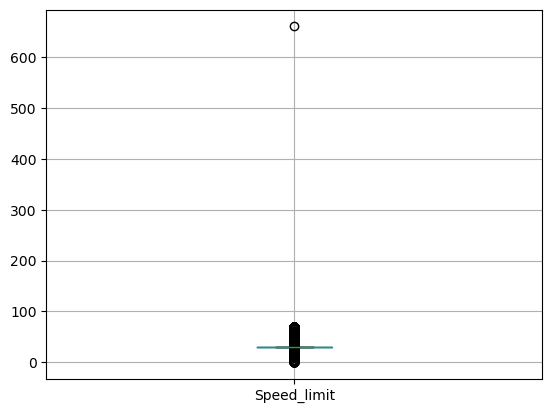

In [109]:
# Boxplot of Speed limit column
df_Ac_clean.boxplot(column=['Speed_limit'])
plt.show()

In [110]:
# Handle outliers in speed limit column
# UK speed limits are between 20mph and 70mph. 
# The value of 660 can be treated as a typographical error and replaced with 66mph, 60mph or the mean.

df_Ac_clean[df_Ac_clean['Speed_limit'] > 600]
df_Ac_clean.at['199032C064990','Speed_limit'] = 66
df_Ac_clean.at['199032C064990','Speed_limit']

np.float64(66.0)

In [111]:
# Check validity of number of casualties and number of vehicles

df_Ac_clean[df_Ac_clean['Number_of_Casualties'] == 0]
df_Ac_clean[df_Ac_clean['Number_of_Vehicles'] == 0]

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
Accident_Index,,,,,,,,,,,


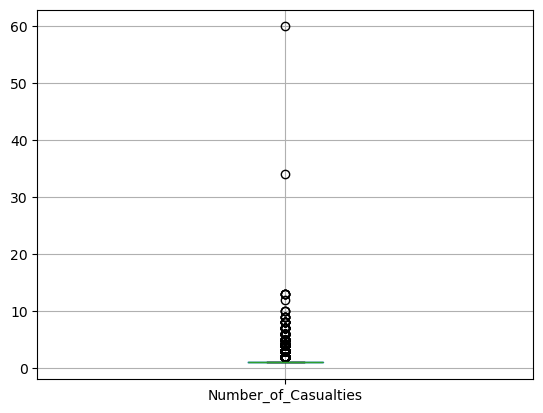

In [112]:
# Boxplot of number of casualties
# Some values can be considered as outliers visually and using the IQR
# They were however not removed because it is possible that accidents tragically may involve such casualties

df_Ac_clean.boxplot(column=['Number_of_Casualties'])
plt.show()

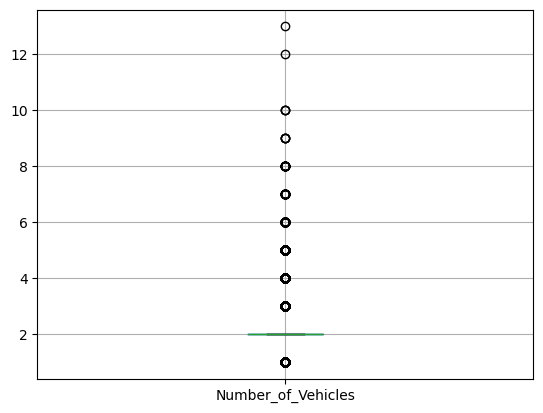

In [113]:
# Boxplot of number of vehicles
# Some values can be considered as outliers visually and using the IQR
# They were however not removed because it is possible that accidents tragically may involve such number of vehicles
df_Ac_clean.boxplot(column=['Number_of_Vehicles'])
plt.show()

#### Get summary of Bikers dataset

In [114]:
# get shape of bikers dataset
df_Bk.shape

(827871, 4)

In [115]:
# get summary of bikers dataset
df_Bk.describe()

,Accident_Index,Gender,Severity,Age_Grp
count,827871,827871,827871,827871
unique,827871,3,3,9
top,2018983133818,Male,Slight,11 to 15
freq,1,660031,681578,169945


In [116]:
# get summary of bikers dataset
df_Bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827871 entries, 0 to 827870
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Accident_Index  827871 non-null  object
 1   Gender          827871 non-null  object
 2   Severity        827871 non-null  object
 3   Age_Grp         827871 non-null  object
dtypes: object(4)
memory usage: 25.3+ MB


#### Data cleaning for Bikers dataset

In [117]:
# check the number of duplicates
sum_duplicates(df_Bk)

'There are 0 number of duplicates'

In [118]:
# check the number of null values
sum_null_values(df_Bk)

Accident_Index    0
Gender            0
Severity          0
Age_Grp           0
dtype: int64

In [119]:
# Find inconsistent values in the gender column
get_value_count(df_Bk, 'Gender')

,count
Gender,
Male,660031
Female,167721
Other,119


In [120]:
# Find inconsistent values in the severity column
get_value_count(df_Bk, 'Severity')

,count
Severity,
Slight,681578
Serious,139563
Fatal,6730


In [121]:
# Find inconsistent values in the age group column
get_value_count(df_Bk, 'Age_Grp')

,count
Age_Grp,
11 to 15,169945
26 to 35,145081
16 to 20,122604
36 to 45,103774
21 to 25,87292
46 to 55,73578
6 to 10,68021
56 to 65,41913
66 to 75,15663


In [122]:
# backup original dataset before cleaning
df_Bk_clean = df_Bk
df_Bk_clean.head()

,Accident_Index,Gender,Severity,Age_Grp
0,197901A1SEE71,Male,Serious,36 to 45
1,197901A2JDW40,Male,Slight,46 to 55
2,197901A4IJV90,Male,Slight,46 to 55
3,197901A4NIE33,Male,Slight,36 to 45
4,197901A4SKO47,Male,Slight,46 to 55


In [123]:
# set index of dataframe
df_Bk_clean = change_index(df_Bk_clean,'Accident_Index')
df_Bk_clean.head()

,Gender,Severity,Age_Grp
Accident_Index,,,
197901A1SEE71,Male,Serious,36 to 45
197901A2JDW40,Male,Slight,46 to 55
197901A4IJV90,Male,Slight,46 to 55
197901A4NIE33,Male,Slight,36 to 45
197901A4SKO47,Male,Slight,46 to 55


#### Univariate Analysis of Bikers Dataset

In [124]:
# Distribution of injury severity
df_Bk_severity_dist = get_count_percent(df_Bk_clean,'Severity')
df_Bk_severity_dist

,Count (n),Percentage (%)
Severity,,
Slight,681578,82.329010
Serious,139563,16.858061
Fatal,6730,0.812929


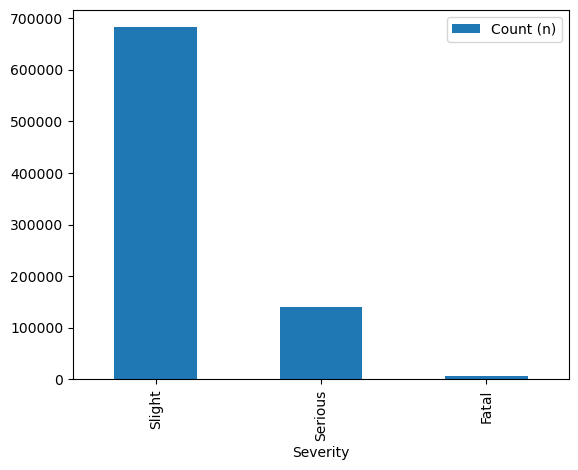

In [125]:
# Bar chart of severity distribution
df_Bk_severity_dist.plot(kind='bar', y='Count (n)', legend='False')
# plt.title('Distribution of accident severity')
plt.show()

In [126]:
# Distribution of casualties by gender
df_Bk_gender_dist = get_count_percent(df_Bk_clean,'Gender')

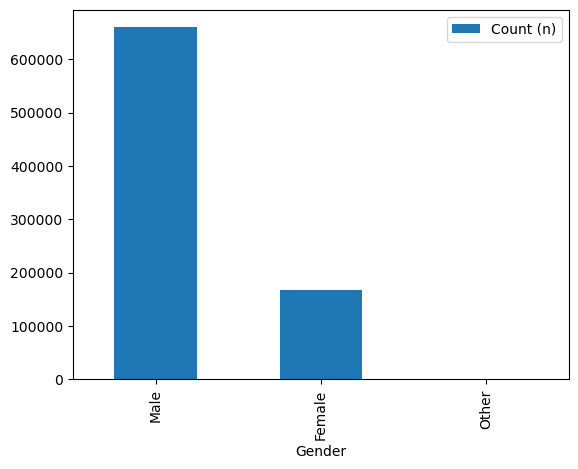

In [127]:
# Bar chart of gender distribution
df_Bk_gender_dist.plot(kind='bar', y='Count (n)')
plt.title = 'Gender distribution of bikers'
plt.show()

In [128]:
# Distribution of casualties by age group
df_Bk_age_grp_dist = get_count_percent(df_Bk_clean,'Age_Grp')
df_Bk_age_grp_dist

,Count (n),Percentage (%)
Age_Grp,,
11 to 15,169945,20.527957
26 to 35,145081,17.524590
16 to 20,122604,14.809554
36 to 45,103774,12.535045
21 to 25,87292,10.544155
46 to 55,73578,8.887617
6 to 10,68021,8.216377
56 to 65,41913,5.062745
66 to 75,15663,1.891961


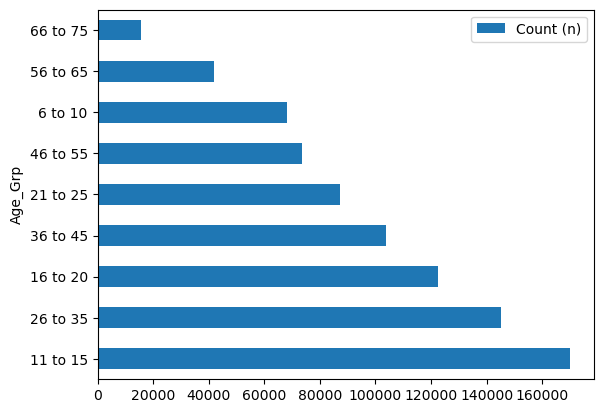

In [129]:
# Bar chart of age group distribution
df_Bk_age_grp_dist.plot(kind='barh', y='Count (n)')
plt.title = 'Distribution of casualties by age group'
plt.show()

#### Univariate Analysis of Accident Dataset

In [130]:
# Distribution of road conditions during accidents
df_Ac_road_cond_dist = get_count_percent(df_Ac_clean,'Road_conditions')
df_Ac_road_cond_dist

,Count (n),Percentage (%)
Road_conditions,,
Dry,633936,76.575174
Wet,184279,22.259655
Frost,6020,0.727175
Snow,1710,0.206556
Missing Data,1648,0.199067
Flood,268,0.032373


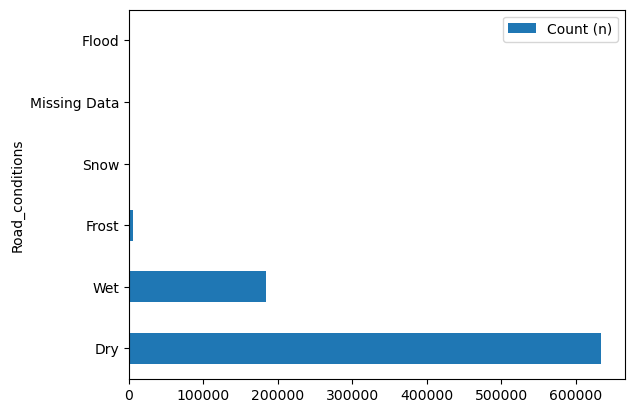

In [131]:
# Bar chart for distribution of road conditions
df_Ac_road_cond_dist.plot(kind='barh', y='Count (n)')
plt.title = 'Distribution of road conditions'
plt.show()

In [132]:
# Distribution of weather conditions during accidents
df_Ac_weather_cond_dist = get_count_percent(df_Ac_clean,'Weather_conditions')
df_Ac_weather_cond_dist

,Count (n),Percentage (%)
Weather_conditions,,
Clear,683162,82.521341
Rain,82007,9.905890
Unknown,24235,2.927424
Clear and windy,11891,1.436352
Other,11820,1.427776
Rain and windy,8808,1.063947
Fog,3369,0.406952
Snow,2086,0.251975
Snow and windy,483,0.058343


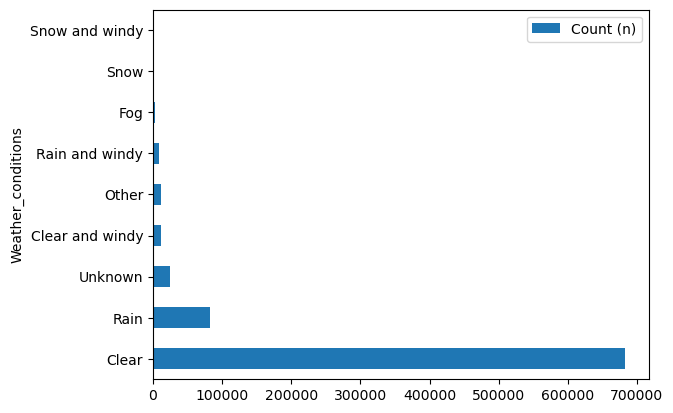

In [133]:
# Bar chart of the distribution of weather conditions
df_Ac_weather_cond_dist.plot(kind='barh', y='Count (n)')
plt.title ='Distribution for weather conditions'
plt.show()

In [134]:
# Distribution of days of the week accidents happened
df_Ac_days_dist = get_count_percent(df_Ac_clean,'Day')
df_Ac_days_dist

,Count (n),Percentage (%)
Day,,
Wednesday,136756,16.519198
Tuesday,136534,16.492382
Thursday,136263,16.459647
Friday,132066,15.952678
Monday,125749,15.189627
Saturday,87652,10.587768
Sunday,72841,8.798699


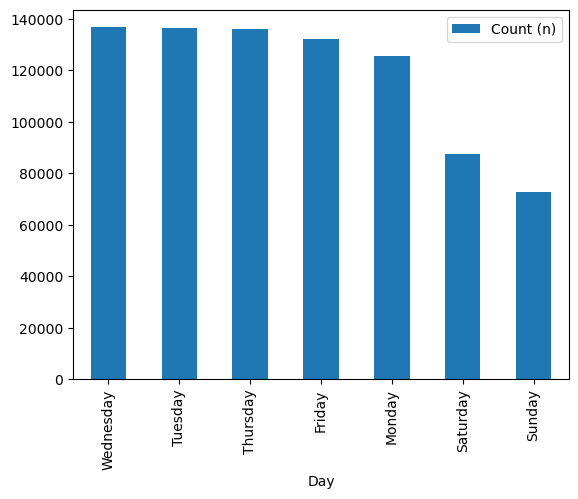

In [135]:
# Bar chart for distribution by day
df_Ac_days_dist.plot(kind='bar', y='Count (n)')
plt.title = 'Distribution of accidents by day of the week'
plt.show()

In [136]:
# Distribution of the roads on which happened
df_Ac_road_type_dist = get_count_percent(df_Ac_clean,'Road_type')
df_Ac_road_type_dist

,Count (n),Percentage (%)
Road_type,,
Single carriageway,656703,79.325273
Roundabout,75066,9.067464
Dual carriageway,59037,7.131270
Unknown,30647,3.701950
One way street,5562,0.671852
Slip road,846,0.102191


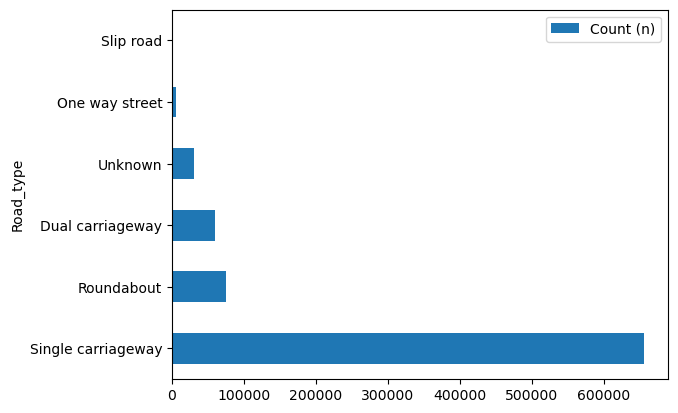

In [137]:
# Bar chart for distribution by road type
df_Ac_road_type_dist.plot(kind='barh', y='Count (n)')
plt.title = 'Distribution of accidents by road type'
plt.show()

In [138]:
# Distribution of the light conditions during accidents
df_Ac_light_condition_dist = get_count_percent(df_Ac_clean,'Light_conditions')
df_Ac_light_condition_dist

,Count (n),Percentage (%)
Light_conditions,,
Daylight,660657,79.802890
Darkness lights lit,142039,17.157349
Darkness no lights,25165,3.039762


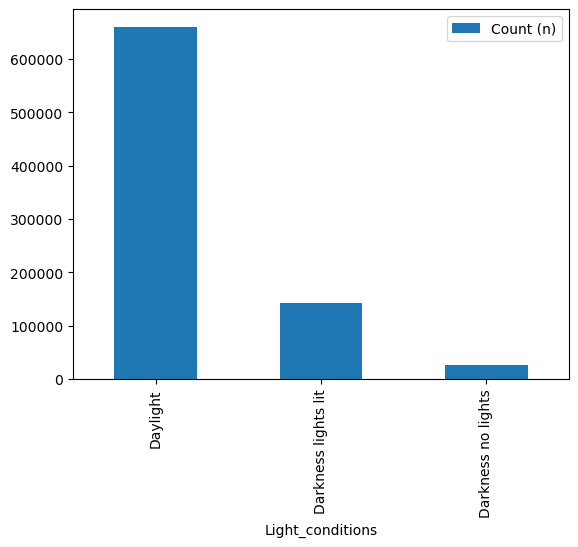

In [139]:
# Bar chart of accident distribution by light condtions
df_Ac_light_condition_dist.plot(kind='bar', y='Count (n)')
plt.title = 'Bar chart of distribution by light conditions'
plt.show()

##### Normality Tests

In [140]:
# Statistical test for normality of Number of vehicles
check_normality(df_Ac_clean['Number_of_Vehicles'], 'Number_of_Vehicles')


Normality Tests for: Number_of_Vehicles

Shapiro-Wilk Test:
  Statistic: 0.3691
  P-value: 0.0000
  Normal? No

Kolmogorov-Smirnov Test:
  Statistic: 0.4672
  P-value: 0.0000
  Normal? No

Descriptive Statistics:
  Skewness: 1.1493 (normal ≈ 0. -1 to +1)
  Kurtosis: 27.3324 (normal ≈ 0. -1 to +1)


D:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 827861.
  res = hypotest_fun_out(*samples, **kwds)


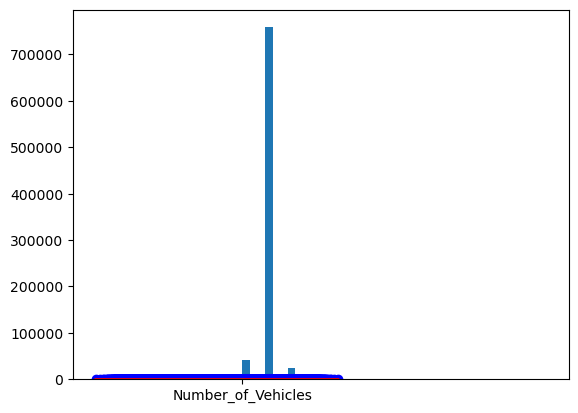

In [141]:
# Visual test for normality - Histogram/Boxplot/Q-Q plot of number of vehicles

# The data can be considered to have a non-uniform distribution from visual methods

df_Ac_clean['Number_of_Vehicles'].hist(bins=40)
df_Ac_clean['Number_of_Vehicles'].plot(kind='box')
stats.probplot(df_Ac_clean['Number_of_Vehicles'], dist="norm", plot=plt)
plt.show()

In [142]:
# Statistical test for normality of Number of casualties
check_normality(df_Ac_clean['Number_of_Casualties'], 'Number_of_Casualties')


Normality Tests for: Number_of_Casualties

Shapiro-Wilk Test:
  Statistic: 0.1738
  P-value: 0.0000
  Normal? No

Kolmogorov-Smirnov Test:
  Statistic: 0.5314
  P-value: 0.0000
  Normal? No


D:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 827861.
  res = hypotest_fun_out(*samples, **kwds)



Descriptive Statistics:
  Skewness: 24.5344 (normal ≈ 0. -1 to +1)
  Kurtosis: 3978.0675 (normal ≈ 0. -1 to +1)


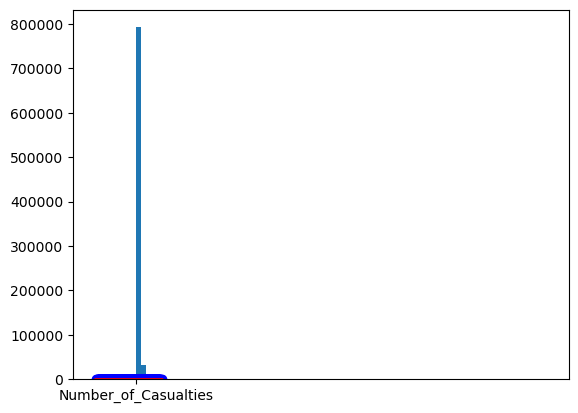

In [143]:
# Visual test for normality - Histogram/Boxplot/Q-Q plot of number of casualties

# The data can be considered to have a non-uniform distribution from visual methods

df_Ac_clean['Number_of_Casualties'].hist(bins=80)
df_Ac_clean['Number_of_Casualties'].plot(kind='box')
stats.probplot(df_Ac_clean['Number_of_Casualties'], dist="norm", plot=plt)
plt.show()

In [144]:
# Statistical test for normality for speed limit
check_normality(df_Ac_clean['Speed_limit'], 'Speed_limit')


Normality Tests for: Speed_limit

Shapiro-Wilk Test:
  Statistic: 0.4661
  P-value: 0.0000
  Normal? No


D:\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 827861.
  res = hypotest_fun_out(*samples, **kwds)



Kolmogorov-Smirnov Test:
  Statistic: 0.4839
  P-value: 0.0000
  Normal? No

Descriptive Statistics:
  Skewness: 2.5323 (normal ≈ 0. -1 to +1)
  Kurtosis: 5.4532 (normal ≈ 0. -1 to +1)


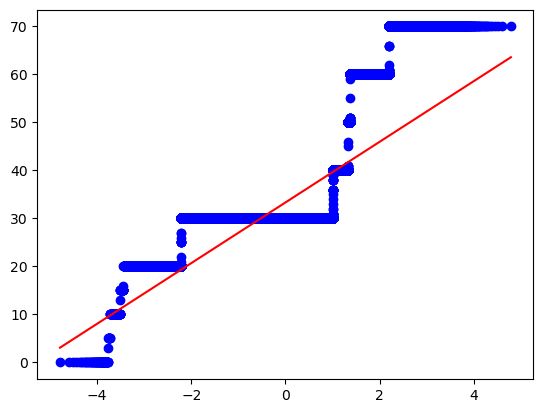

In [145]:
# Visual test for normality - Histogram/Boxplot/Q-Q plot for speed limit

# The data can be considered to have a non-uniform distribution from visual methods

# df_Ac_clean['Speed_limit'].hist(bins=30)
# df_Ac_clean['Speed_limit'].plot(kind='box')
stats.probplot(df_Ac_clean['Speed_limit'], dist="norm", plot=plt)
plt.show()

#### Bivariate analysis of Bikers dataset

In [146]:
# Contigency table for gender and accident severity
gender_severity_count_cross_table = count_cross_tabs(df_Bk_clean,'Gender','Severity') 
gender_severity_percent_cross_table = percent_cross_tabs(df_Bk_clean,'Gender','Severity')
gender_severity_percent_cross_table.round(2)

Severity,Fatal,Serious,Slight
Gender,,,
Female,0.71,16.01,83.28
Male,0.84,17.08,82.08
Other,0.00,2.52,97.48


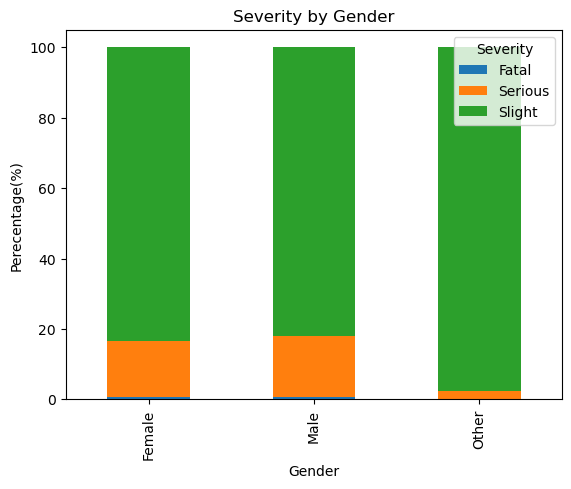

In [147]:
# Barchart for severity by gender
gender_severity_percent_cross_table.plot(kind='bar', stacked=True,xlabel='Gender', 
                                         ylabel='Perecentage(%)', title='Severity by Gender', layout='tight')
plt.show()

In [148]:
# Contigency table for age group and accident severity
age_grp_severity_count_cross_table = count_cross_tabs(df_Bk_clean,'Age_Grp','Severity')
age_grp_severity_percent_cross_table = percent_cross_tabs(df_Bk_clean,'Age_Grp','Severity')
age_grp_severity_percent_cross_table.round(2)

Severity,Fatal,Serious,Slight
Age_Grp,,,
11 to 15,0.68,16.62,82.70
16 to 20,0.58,15.26,84.16
21 to 25,0.53,14.57,84.90
26 to 35,0.57,14.79,84.64
36 to 45,0.78,17.26,81.97
46 to 55,1.24,20.48,78.28
56 to 65,2.06,23.46,74.48
6 to 10,0.57,16.94,82.49
66 to 75,3.84,26.18,69.98


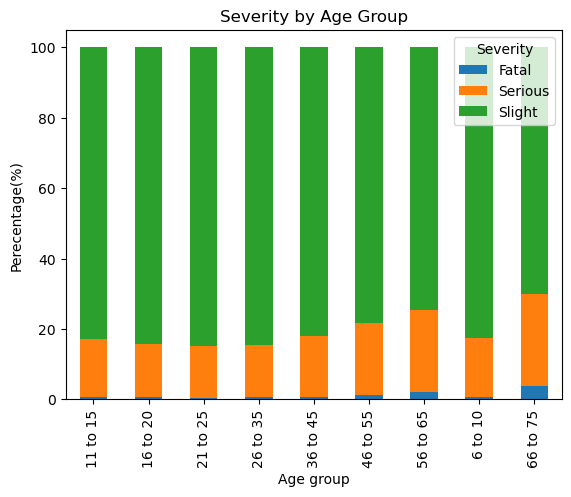

In [149]:
# Barchart for severity by age group
age_grp_severity_percent_cross_table.plot(kind='bar', stacked=True,xlabel='Age group', 
                                         ylabel='Perecentage(%)', title='Severity by Age Group', layout='tight')
plt.show()

In [150]:
# Contigency table for age group and gender 
gender_age_group_count_cross_table = count_cross_tabs(df_Bk_clean,'Age_Grp','Gender')
gender_age_group_percent_cross_table = percent_cross_tabs(df_Bk_clean,'Age_Grp','Gender')
gender_age_group_percent_cross_table.round(2)

Gender,Female,Male,Other
Age_Grp,,,
11 to 15,15.19,84.79,0.02
16 to 20,18.48,81.50,0.02
21 to 25,25.67,74.32,0.01
26 to 35,22.54,77.45,0.01
36 to 45,20.78,79.21,0.01
46 to 55,23.54,76.45,0.01
56 to 65,24.16,75.82,0.01
6 to 10,17.27,82.68,0.04
66 to 75,21.50,78.48,0.02


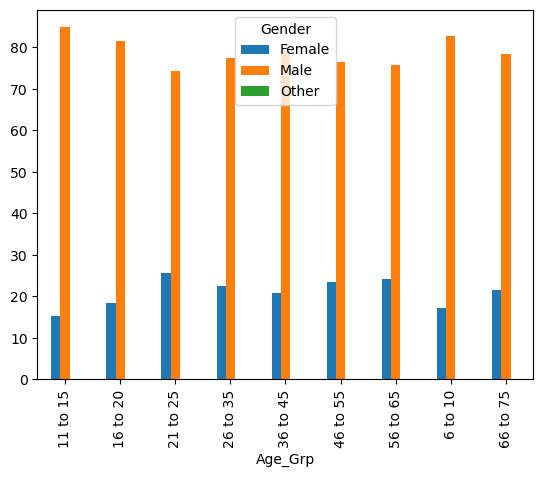

In [151]:
# Barchart for age group and gender
gender_age_group_percent_cross_table.plot(kind='bar')
plt.show()

#### Bivariate analysis for Accidents dataset

In [152]:
# Casualty statistics by day of the week
casualties_by_day = stats_groupby(df_Ac_clean,'Day','Number_of_Casualties')
casualties_by_day

,median,mean,count,sum
Day,,,,
Sunday,1.0,1.068876,72841,77858
Saturday,1.0,1.055812,87652,92544
Monday,1.0,1.045305,125749,131446
Friday,1.0,1.043630,132066,137828
Thursday,1.0,1.044091,136263,142271
Tuesday,1.0,1.043059,136534,142413
Wednesday,1.0,1.042631,136756,142586


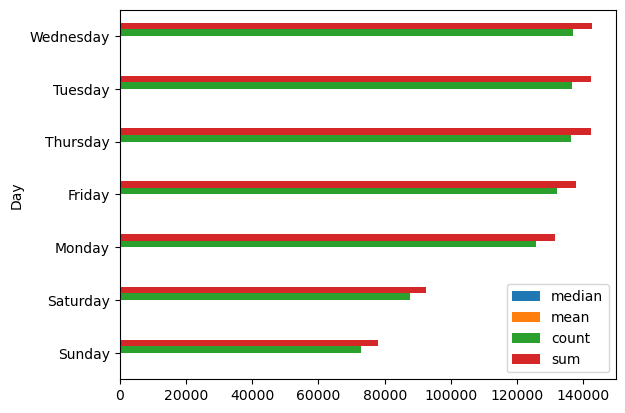

In [153]:
# Barchart of Casualty statistics by day of the week
casualties_by_day.plot(kind='barh')
plt.show()

In [154]:
# Casualty statistics by road conditions
casualties_by_road_conditions = stats_groupby(df_Ac_clean,'Road_conditions','Number_of_Casualties')
casualties_by_road_conditions

,median,mean,count,sum
Road_conditions,,,,
Flood,1.0,1.063433,268,285
Missing Data,1.0,1.029733,1648,1697
Snow,1.0,1.029825,1710,1761
Frost,1.0,1.044684,6020,6289
Wet,1.0,1.042305,184279,192075
Dry,1.0,1.048748,633936,664839


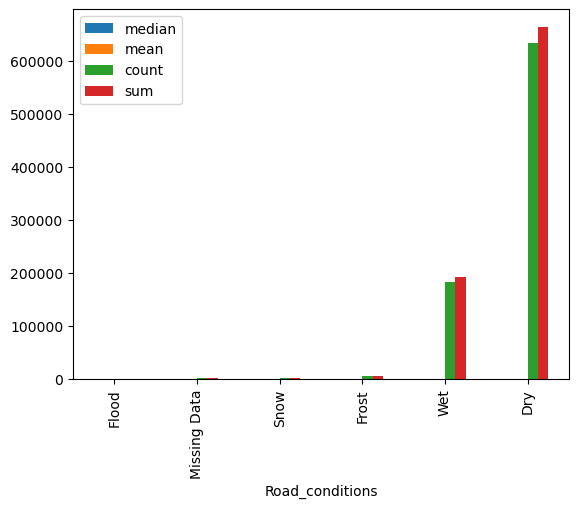

In [155]:
# Barchart of Casualty statistics by road conditions
casualties_by_road_conditions.plot(kind='bar')
plt.show()

In [156]:
# Casualty statistics by weather conditions
casualties_by_weather_conditions = stats_groupby(df_Ac_clean,'Weather_conditions','Number_of_Casualties')
casualties_by_weather_conditions

,median,mean,count,sum
Weather_conditions,,,,
Snow and windy,1.0,1.031056,483,498
Snow,1.0,1.034995,2086,2159
Fog,1.0,1.032651,3369,3479
Rain and windy,1.0,1.034741,8808,9114
Other,1.0,1.022673,11820,12088
Clear and windy,1.0,1.045076,11891,12427
Unknown,1.0,1.045389,24235,25335
Rain,1.0,1.038802,82007,85189
Clear,1.0,1.049029,683162,716657


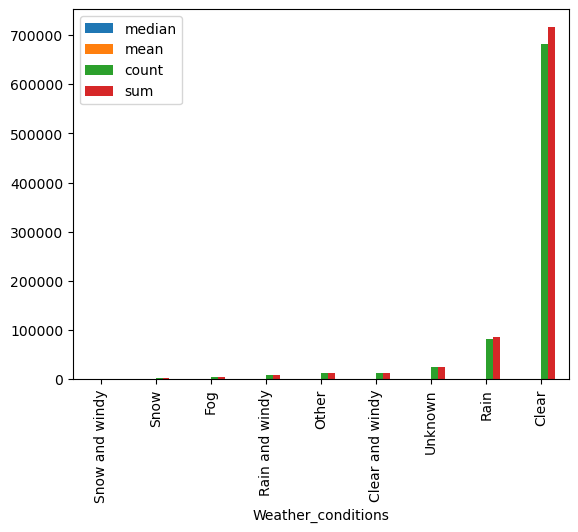

In [157]:
# Barchart of Casualty statistics by weather conditions
casualties_by_weather_conditions.plot(kind='bar')
plt.show()

In [158]:
# Casualty statistics by road type
casualties_by_road_type = stats_groupby(df_Ac_clean,'Road_type','Number_of_Casualties')
casualties_by_road_type

,median,mean,count,sum
Road_type,,,,
Slip road,1.0,1.034279,846,875
One way street,1.0,1.034880,5562,5756
Unknown,1.0,1.042941,30647,31963
Dual carriageway,1.0,1.055033,59037,62286
Roundabout,1.0,1.018317,75066,76441
Single carriageway,1.0,1.050132,656703,689625


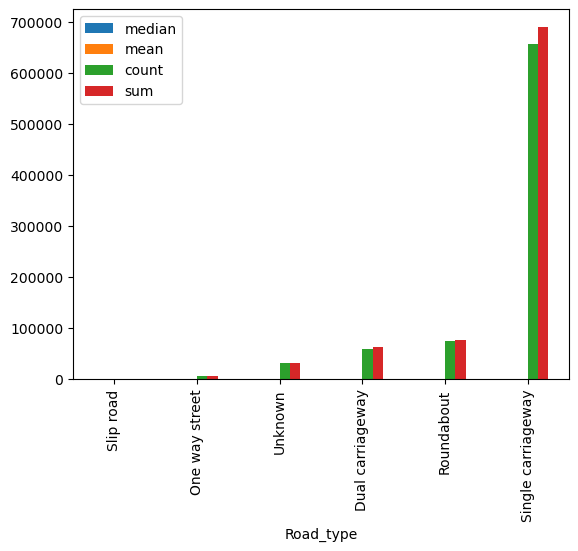

In [159]:
# Barchart of Casualty statistics by road type
casualties_by_road_type.plot(kind='bar')
plt.show()

In [160]:
# Casualty statistics by light conditions
casualties_by_light_conditions = stats_groupby(df_Ac_clean,'Light_conditions','Number_of_Casualties')
casualties_by_light_conditions

,median,mean,count,sum
Light_conditions,,,,
Darkness no lights,1.0,1.065249,25165,26807
Darkness lights lit,1.0,1.039531,142039,147654
Daylight,1.0,1.048176,660657,692485


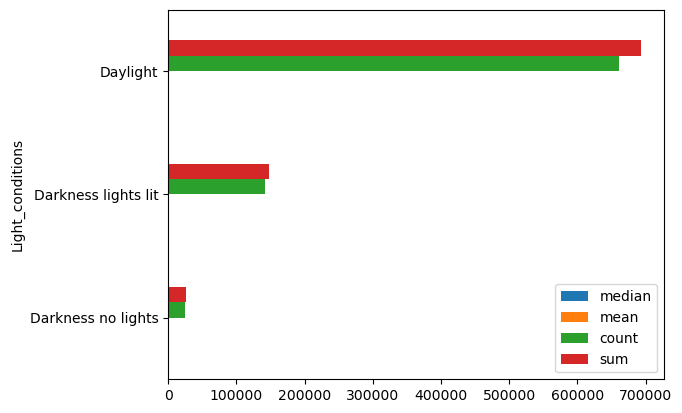

In [161]:
# Barchart of Casualty statistics by light conditions
casualties_by_light_conditions.plot(kind='barh')
plt.show()

In [162]:
# Casualty burdern light condition and road type 
casualties_by_road_type_light_conditions = pd.DataFrame(df_Ac_clean.groupby(['Road_type','Light_conditions'], as_index=False)['Number_of_Casualties'].sum())
casualties_by_road_type_light_conditions

,Road_type,Light_conditions,Number_of_Casualties
0,Dual carriageway,Darkness lights lit,11359
1,Dual carriageway,Darkness no lights,2319
2,Dual carriageway,Daylight,48608
3,One way street,Darkness lights lit,1111
4,One way street,Darkness no lights,95
5,One way street,Daylight,4550
6,Roundabout,Darkness lights lit,19057
7,Roundabout,Darkness no lights,1807
8,Roundabout,Daylight,55577
9,Single carriageway,Darkness lights lit,111214


In [163]:
# Casualty burdern weather condition and road type
casualties_by_road_type_weather_conditions = pd.DataFrame(df_Ac_clean.groupby(['Road_type','Weather_conditions'], as_index=False)['Number_of_Casualties'].sum())
casualties_by_road_type_weather_conditions

,Road_type,Weather_conditions,Number_of_Casualties
0,Dual carriageway,Clear,51436
1,Dual carriageway,Clear and windy,1138
2,Dual carriageway,Fog,239
3,Dual carriageway,Other,781
4,Dual carriageway,Rain,6121
5,Dual carriageway,Rain and windy,740
6,Dual carriageway,Snow,150
7,Dual carriageway,Snow and windy,37
8,Dual carriageway,Unknown,1644
9,One way street,Clear,4976


#### Time Series Analysis

In [164]:
# Casualties per year

# set index of dataframe to Date
df_Ac_time_series = df_Ac_clean.set_index('Date')
casualties_per_year = pd.DataFrame(df_Ac_time_series.resample('YE')["Number_of_Casualties"].sum())
casualties_per_year

,Number_of_Casualties
Date,
1979-12-31,24007
1980-12-31,25206
1981-12-31,25723
1982-12-31,28782
1983-12-31,31010
1984-12-31,31279
1985-12-31,27087
1986-12-31,26116
1987-12-31,26188


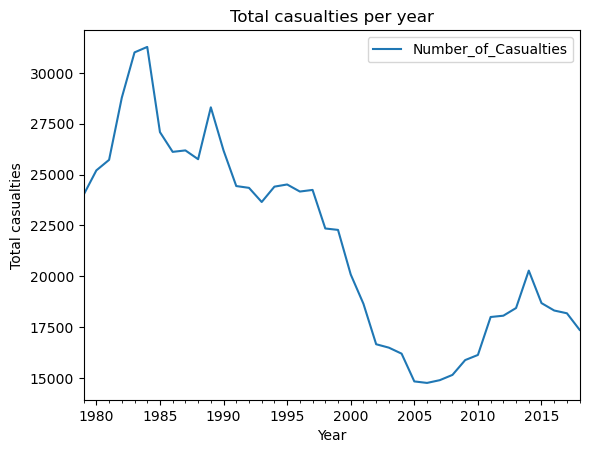

In [165]:
# Line graph of casualties per year
casualties_per_year.plot(xlabel="Year", ylabel="Total casualties", title="Total casualties per year")
plt.show()

In [166]:
# Number of vehicles involved Accidents per year

vehicles_in_accidents_per_year = pd.DataFrame(df_Ac_time_series.resample("YE")["Number_of_Vehicles"].sum())
vehicles_in_accidents_per_year

,Number_of_Vehicles
Date,
1979-12-31,44300
1980-12-31,46317
1981-12-31,47327
1982-12-31,52835
1983-12-31,57485
1984-12-31,58094
1985-12-31,50566
1986-12-31,49131
1987-12-31,49324


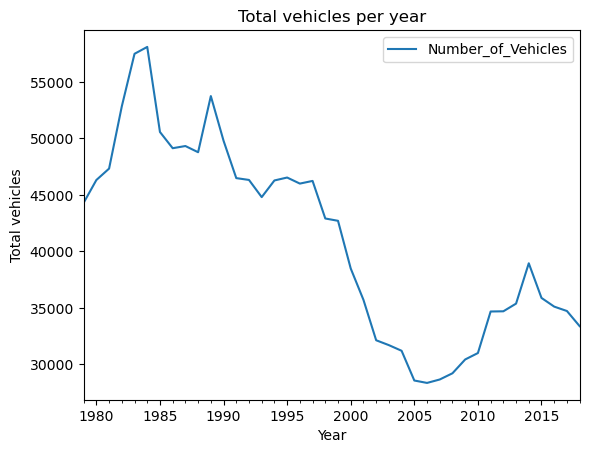

In [167]:
# Line graph of Number of vehicles involved Accidents per year
vehicles_in_accidents_per_year.plot(xlabel="Year", ylabel="Total vehicles", title="Total vehicles per year")
plt.show()

In [168]:
# Casualties per month over the years

df_Ac_time_series["Month"] = df_Ac_clean["Date"].dt.month.values
casualties_per_month = pd.DataFrame(
    df_Ac_time_series.groupby("Month")["Number_of_Casualties"].mean()
)
casualties_per_month

,Number_of_Casualties
Month,
1,1.040373
2,1.043477
3,1.045952
4,1.050060
5,1.049654
6,1.049719
7,1.052258
8,1.052059
9,1.047310


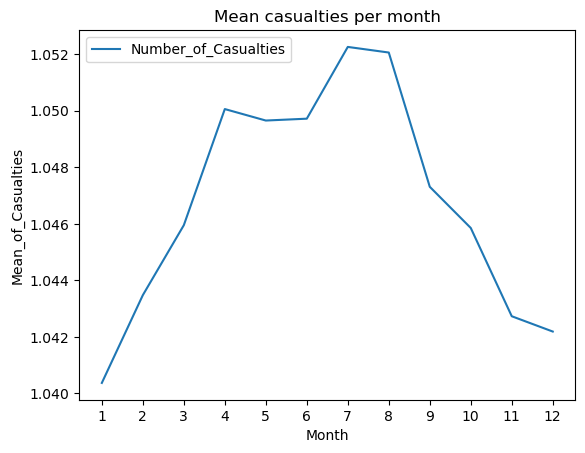

In [169]:
# Line graph of Casualties per month over the years
casualties_per_month=casualties_per_month.sort_values(by="Month",ascending=True)
cpm_graph = casualties_per_month.plot(xlabel="Month", ylabel="Mean_of_Casualties", title="Mean casualties per month")
cpm_graph.set_xticks(range(1,13))
plt.show()

# relate with seasons. Warmer = More casulaties

In [170]:
# Accidents per month over the years

df_Ac_time_series["Month"] = df_Ac_clean["Date"].dt.month.values
accidents_per_month = pd.DataFrame(
    df_Ac_time_series.groupby("Month")["Accident_Index"].nunique()
)
accidents_per_month

,Accident_Index
Month,
1,61477
2,54672
3,62260
4,66261
5,75664
6,78722
7,83299
8,76951
9,75396


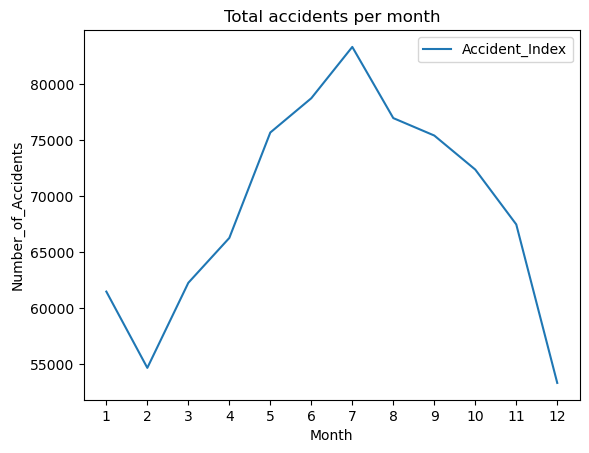

In [171]:
# Line graph of Accidents per month over the years
accidents_per_month=accidents_per_month.sort_values(by="Month",ascending=True)
apm_graph = accidents_per_month.plot(xlabel="Month", ylabel="Number_of_Accidents", title="Total accidents per month")
apm_graph.set_xticks(range(1,13))
plt.show()

# relate with seasons. Warmer = More casulaties

In [172]:
# Categorize time of the day into traffic status

# Morning Rush Hour: 7-9
# Inter Peak: 10-15
# Afternoon School Pickup: 15-16
# Evening Rush Hour: 17-19
# Late Evening: 19+

df_Ac_clean['Traffic_status'] = df_Ac_clean["Time"].str.split(':').str[0].astype(int).apply(
    lambda x: 
        'Morning Rush Hour' if (7 <= x <= 9) else (
        'Day Off-Peak' if (10 <= x <= 14) else (
        'Afternoon School Pickup' if (15 <= x <= 16) else (
        'Evening Rush Hour' if (17 <= x <= 19) else (
        'Night/Dawn Off-Peak'))))
)
df_Ac_clean.head(10)

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Traffic_status
Accident_Index,,,,,,,,,,,,
197901A1SEE71,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Evening Rush Hour
197901A2JDW40,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Morning Rush Hour
197901A4IJV90,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Morning Rush Hour
197901A4NIE33,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Day Off-Peak
197901A4SKO47,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Evening Rush Hour
197901A5CKE54,197901A5CKE54,2,1,1979-05-01,02:50,40.0,Snow,Unknown,Friday,Dual carriageway,Darkness lights lit,Night/Dawn Off-Peak
197901A5UJC75,197901A5UJC75,2,1,1979-05-01,20:45,30.0,Wet,Unknown,Friday,Single carriageway,Darkness lights lit,Night/Dawn Off-Peak
197901A6ODP50,197901A6ODP50,2,1,1979-06-01,14:15,70.0,Snow,Unknown,Saturday,Unknown,Daylight,Day Off-Peak
197901A6VEC34,197901A6VEC34,2,1,1979-06-01,21:20,30.0,Wet,Unknown,Saturday,Roundabout,Darkness lights lit,Night/Dawn Off-Peak


In [173]:
# Accidents per traffic status
accidents_per_traffic_status = pd.DataFrame(
    df_Ac_clean.groupby("Traffic_status")["Accident_Index"].nunique().sort_values()
)
accidents_per_traffic_status

,Accident_Index
Traffic_status,
Night/Dawn Off-Peak,106698
Afternoon School Pickup,142676
Morning Rush Hour,166617
Day Off-Peak,197129
Evening Rush Hour,214741


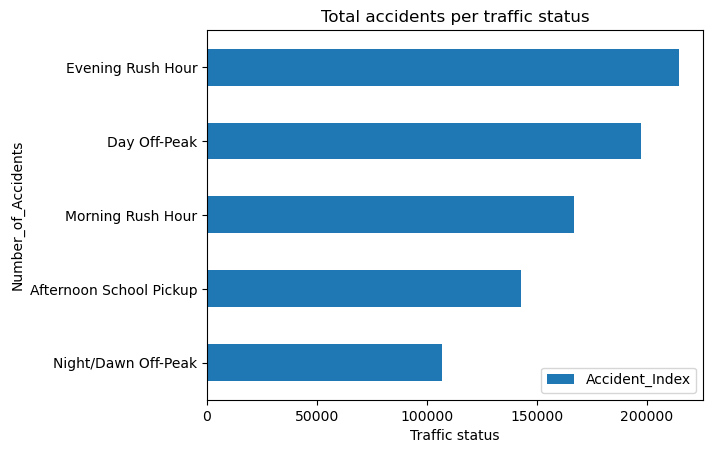

In [174]:
# Bar chart of accidents per traffic status
accidents_per_traffic_status.plot(kind='barh', xlabel="Traffic status", ylabel="Number_of_Accidents", title="Total accidents per traffic status")
# plt.xticks(rotation=90, ha='right')
plt.show()

In [175]:
# Casualties per traffic status
casualties_per_traffic_status = pd.DataFrame(
    df_Ac_clean.groupby("Traffic_status")["Number_of_Casualties"].sum().sort_values()
)
casualties_per_traffic_status

,Number_of_Casualties
Traffic_status,
Night/Dawn Off-Peak,111941
Afternoon School Pickup,149768
Morning Rush Hour,172946
Day Off-Peak,207228
Evening Rush Hour,225063


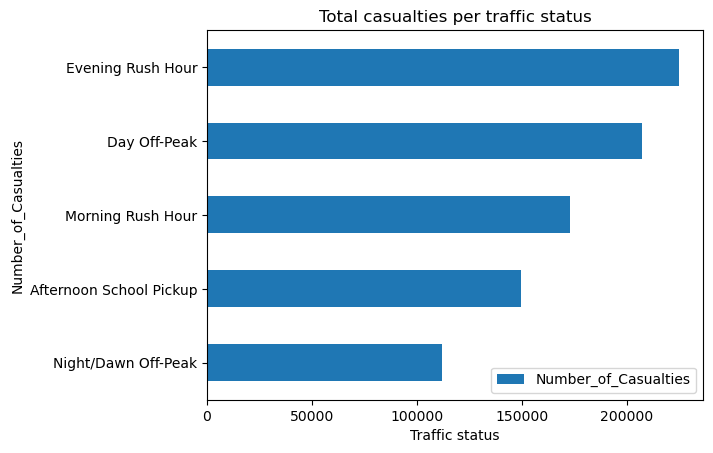

In [176]:
# Bar chart of Casualties per traffic status
casualties_per_traffic_status.plot(kind='barh', xlabel="Traffic status", ylabel="Number_of_Casualties", title="Total casualties per traffic status")
# plt.xticks(rotation=90, ha='right')
plt.show()

### Inferential Statistics

In [181]:
# Merge the accidents and bikers tables

df_Ac_merge = df_Ac_clean.drop('Accident_Index', axis=1)
df_Ac_Bk_clean = pd.merge(df_Ac_merge, df_Bk_clean, on='Accident_Index', how='left')
df_Ac_Bk_clean.describe()

,Number_of_Vehicles,Number_of_Casualties,Date,Speed_limit
count,827861.000000,827861.000000,827861,827861.000000
mean,1.986178,1.047212,1996-12-30 04:24:36.160853120,33.340217
min,1.000000,1.000000,1979-01-01 00:00:00,0.000000
25%,2.000000,1.000000,1987-01-16 00:00:00,30.000000
50%,2.000000,1.000000,1995-07-29 00:00:00,30.000000
75%,2.000000,1.000000,2006-08-29 00:00:00,30.000000
max,13.000000,60.000000,2018-12-31 00:00:00,70.000000
std,0.311600,0.253509,NaN,9.252600


In [ ]:
# Test if a relationship exists between road conditions and number of casualties

# Road_conditions[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Road_conditions','Number_of_Casualties')

# KruskalResult(statistic=np.float64(161.7817388834576), pvalue=np.float64(4.128411472930475e-33))

In [ ]:
# Test if a relationship exists between road type and number of casualties

# Road_type[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Road_type','Number_of_Casualties')

# KruskalResult(statistic=np.float64(1339.4839671774698), pvalue=np.float64(1.782172044150907e-287))

In [ ]:
# Test if a relationship exists between weather condition and number of casualties

# weather_condition[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Weather_conditions','Number_of_Casualties')

# KruskalResult(statistic=np.float64(333.93931612338326), pvalue=np.float64(2.418724937241877e-67))

In [ ]:
# Test if a relationship exists between Light conditions and number of casualties

# Light conditions[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Light_conditions','Number_of_Casualties')

# KruskalResult(statistic=np.float64(272.4180174400154), pvalue=np.float64(7.001307096078676e-60))

In [183]:
# Test if a relationship exists between age group and number of casualties

# age_type[ordinal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal–Wallis is suitable 
# Conditions 1. Ordinal IV with several levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Age_Grp','Number_of_Casualties')

# KruskalResult(statistic=np.float64(1287.2840214784853), pvalue=np.float64(1.3171466054277861e-272))

K-H statistic: 1287.2840214784853 
p-value: 1.3171466054277861e-272 
The relationship/difference may be significant


In [184]:
# Test if a relationship exists between gender and number of casualties

# Gender[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal-Wallis is suitable
# Conditions 1. Nominal IV with 3 levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Gender','Number_of_Casualties')

# KruskalResult(statistic=np.float64(24.72630678580953), pvalue=np.float64(4.273175232476011e-06))

K-H statistic: 24.72630678580953 
p-value: 4.273175232476011e-06 
The relationship/difference may be significant


In [185]:
# Test if a relationship exists between traffic status(time of the day) and number of casualties

# Traffic_status[Ordinal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal-Wallis is suitable
# Conditions 1. Ordinal IV with 2+ levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Traffic_status','Number_of_Casualties')

# KruskalResult(statistic=np.float64(300.6675416416083), pvalue=np.float64(7.776939894578762e-64))

K-H statistic: 300.6675416416083 
p-value: 7.776939894578762e-64 
The relationship/difference may be significant


In [186]:
# Test if a relationship exists between day of the week and number of casualties

# Day[Ordinal] x Number of casualties[Ratio - Not Uniformly Distributed]
# Therefore Kruskal-Wallis is suitable
# Conditions 1. Ordinal IV with 2+ levels. 2. Non-normality DV. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_kruskal_wallis(df_Ac_Bk_clean,'Day','Number_of_Casualties')

# KruskalResult(statistic=np.float64(628.1438264081472), pvalue=np.float64(1.9774018406957693e-132))

K-H statistic: 628.1438264081472 
p-value: 1.9774018406957693e-132 
The relationship/difference may be significant


In [229]:
# Test if a relationship exists between road conditions and severity

# road conditions[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Road_conditions','Severity')

# chi_statistic=np.float64(78.14791028431614), pvalue=np.float64(1.1569360455583465e-12)

{'chi_statistic': np.float64(78.14791028431614),
 'pvalue': np.float64(1.1569360455583465e-12),
 'comment': 'Difference or relationship is significant',
 'cross_tab': Severity         Fatal  Serious  Slight
 Road_conditions                        
 Dry               5038   106332  522566
 Flood                5       63     200
 Frost               51     1141    4828
 Missing Data         8      212    1428
 Snow                12      284    1414
 Wet               1616    31531  151132,
 'expected': array([[5.15350920e+03, 1.06870610e+05, 5.21911881e+05],
        [2.17867492e+00, 4.51801498e+01, 2.20641175e+02],
        [4.89388919e+01, 1.01486754e+03, 4.95619356e+03],
        [1.33972249e+01, 2.77824205e+02, 1.35677857e+03],
        [1.39012467e+01, 2.88276329e+02, 1.40782242e+03],
        [1.49807476e+03, 3.10662419e+04, 1.51714683e+05]])}

In [230]:
# Test if a relationship exists between road type and severity

# road type[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Road_type','Severity')

# chi_statistic=np.float64(2884.0712678298723), pvalue=np.float64(0.0)

{'chi_statistic': np.float64(2884.0712678298723),
 'pvalue': np.float64(0.0),
 'comment': 'Difference or relationship is significant',
 'cross_tab': Severity            Fatal  Serious  Slight
 Road_type                                 
 Dual carriageway     1247    11276   46514
 One way street         19      762    4781
 Roundabout            255    10205   64606
 Single carriageway   5066   113276  538361
 Slip road               7      153     686
 Unknown               136     3891   26620,
 'expected': array([[4.79934446e+02, 9.95261382e+03, 4.86044517e+04],
        [4.52156340e+01, 9.37656691e+02, 4.57912767e+03],
        [6.10240342e+02, 1.26548251e+04, 6.18009346e+04],
        [5.33859089e+03, 1.10708731e+05, 5.40655678e+05],
        [6.87745890e+00, 1.42620921e+02, 6.96501620e+02],
        [2.49141233e+02, 5.16655243e+03, 2.52313063e+04]])}

In [231]:
# Test if a relationship exists between weather conditions and severity

# weather conditions[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Weather_conditions','Severity')

# chi_statistic=np.float64(480.79146189280453), pvalue=np.float64(3.752285040730424e-92)

{'chi_statistic': np.float64(480.79146189280453),
 'pvalue': np.float64(3.752285040730424e-92),
 'comment': 'Difference or relationship is significant',
 'cross_tab': Severity            Fatal  Serious  Slight
 Weather_conditions                        
 Clear                5625   116341  561196
 Clear and windy       159     2322    9410
 Fog                    42      621    2706
 Other                  46     1642   10132
 Rain                  523    13250   68234
 Rain and windy        117     1580    7111
 Snow                   19      329    1738
 Snow and windy          2       76     405
 Unknown               197     3402   20636,
 'expected': array([[5.55368626e+03, 1.15169259e+05, 5.62439054e+05],
        [9.66665056e+01, 2.00461627e+03, 9.78971722e+03],
        [2.73878948e+01, 5.67954943e+02, 2.77365716e+03],
        [9.60893193e+01, 1.99264691e+03, 9.73126377e+03],
        [6.66666397e+02, 1.38249573e+04, 6.75153763e+04],
        [7.16036146e+01, 1.48487597e+03, 7.2515

In [234]:
# Test if a relationship exists between light conditions and severity

# light conditions[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Light_conditions','Severity')

# chi_statistic=np.float64(2923.2510284691148), pvalue=np.float64(0.0)

{'chi_statistic': np.float64(2923.2510284691148),
 'pvalue': np.float64(0.0),
 'comment': 'Difference or relationship is significant',
 'cross_tab': Severity             Fatal  Serious  Slight
 Light_conditions                           
 Darkness lights lit   1071    24972  115996
 Darkness no lights     842     5739   18584
 Daylight              4817   108852  546988,
 'expected': array([[1.15468958e+03, 2.39453108e+04, 1.16939000e+05],
        [2.04575949e+02, 4.24238235e+03, 2.07180417e+04],
        [5.37073447e+03, 1.11375307e+05, 5.43910959e+05]])}

In [235]:
# Test if a relationship exists between gender and severity

# Gender[nominal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Gender','Severity')

# chi_statistic=np.float64(158.42511032047113), pvalue=np.float64(3.181755088992447e-33)

{'chi_statistic': np.float64(158.42511032047113),
 'pvalue': np.float64(3.181755088992447e-33),
 'comment': 'Difference or relationship is significant',
 'cross_tab': Severity  Fatal  Serious  Slight
 Gender                          
 Female     1198    26844  139675
 Male       5532   112716  541777
 Other         0        3     116,
 'expected': array([[1.36343590e+03, 2.82741761e+04, 1.38079388e+05],
        [5.36559670e+03, 1.11268763e+05, 5.43390641e+05],
        [9.67396701e-01, 2.00613352e+01, 9.79712681e+01]])}

In [233]:
# Test if a relationship exists between age group and severity

# Age group[Ordinal] x severity[Ordinal]
# Therefore Pearson Chi-square test is suitable
# Conditions 1. Nominal IV with 2+ levels. 2. Ordinal. 3.Independent measures.
# --------------------------------------------------------------------------------------------------

run_chi_square(df_Ac_Bk_clean,'Age_grp','Severity')

# chi_statistic=np.float64(2884.0712678298723), pvalue=np.float64(0.0)

KeyError: 'Age_grp'

In [182]:
df_Ac_Bk_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827861 entries, 197901A1SEE71 to 2018983133818
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Number_of_Vehicles    827861 non-null  int64         
 1   Number_of_Casualties  827861 non-null  int64         
 2   Date                  827861 non-null  datetime64[ns]
 3   Time                  827861 non-null  object        
 4   Speed_limit           827861 non-null  float64       
 5   Road_conditions       827861 non-null  object        
 6   Weather_conditions    827861 non-null  object        
 7   Day                   827861 non-null  object        
 8   Road_type             827861 non-null  object        
 9   Light_conditions      827861 non-null  object        
 10  Traffic_status        827861 non-null  object        
 11  Gender                827861 non-null  object        
 12  Severity              827861 non-null  objec

P: UK Cyclists (1979 - 2018)
I vs C: 
	1.	Single Carriage-way vs Dual Carriage-way
	2.	Darkness-lit vs Daylight / Darkness lit vs Darkness
	3.	Wet vs Dry
	4.	Clear vs Rain / Clear-windy vs Clear / Rain-windy vs Rain
	5.	Below 50mph vs Above 50mph
    6.  Weekday vs Weekend
O:
	1.	Number of casualties 
	2.	Number of accidents 
	3.	Severity(Fatal or Serious)



Road_conditions[Nominal] x Number of casualties[Ratio - Not Uniformly Distributed]

Experimental 
Not-Uniform: Kruskal–Wallis (1. Nominal IV with several levels. 2. Non-normality DV. 3.Independent measures)
Uniform: Between subjects oneway ANOVA (1. Nominal IV with several levels. 2. Normal DV. 3.Independent measures)

Correlational: Point Bi-serial (Pearson) correlation (Nominal and Interval/ratio)